In [8]:

os.environ['PATH'] += os.pathsep+'/home/pirl/Downloads'

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [3]:
df = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/체질검사.csv',engine='python',encoding='euc-kr')
df.head()
len(df)

252

In [4]:
df_y = df["FAT"]
df_x = df.drop("FAT", axis=1,inplace = False)

In [5]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3 , random_state = 1234)


In [6]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

#train 설명력 확인
print(tree_uncustomized.score(df_train_x, df_train_y))
#test 설명력 확인
print(tree_uncustomized.score(df_test_x, df_test_y))

1.0
0.29527370016380716


In [7]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [8]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.295
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


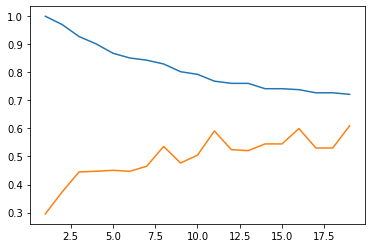

In [9]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "train score")
plt.plot(para_leaf, test_score, linestyle = '-', label = "test score")

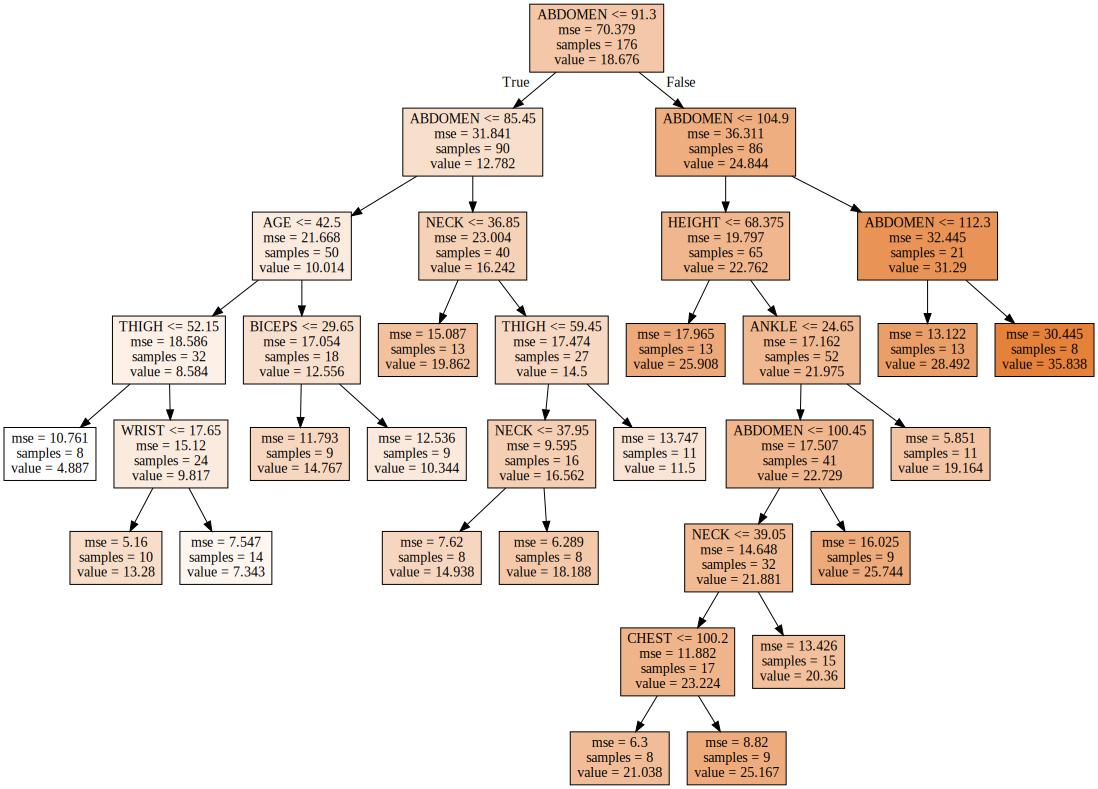

In [10]:
v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot', feature_names=v_feature_name,impurity=True, filled =True)

with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

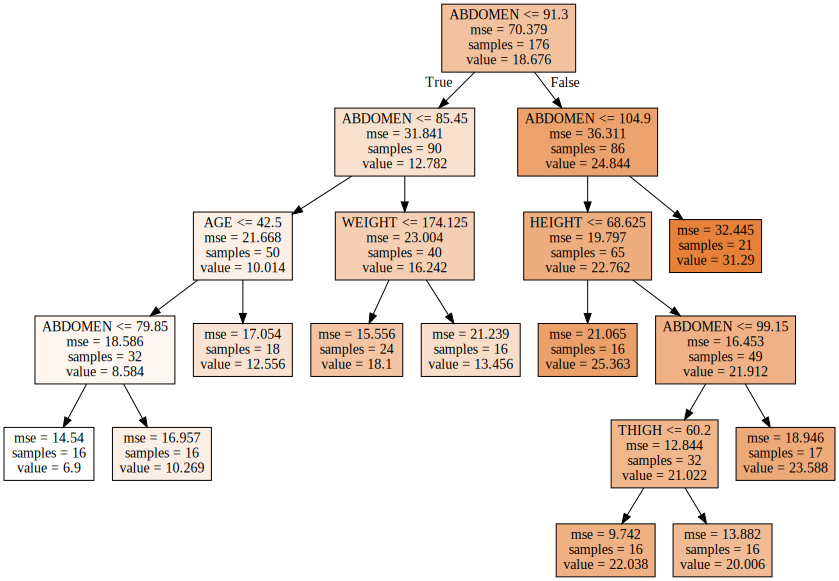

In [11]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot', feature_names = v_feature_name,impurity=True,filled=True)

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [12]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


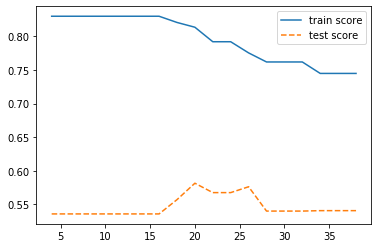

In [13]:
# plt.plot(para_split, train_score, linstyle='-', label = 'Train Score')
# plt.plot(para_split, test_score, linstyle='-', label = 'Test Score')
# plt.legend()

plt.plot(para_split, train_score, linestyle = '-', label = "train score")
plt.plot(para_split, test_score, linestyle = '--', label = "test score")
plt.legend()

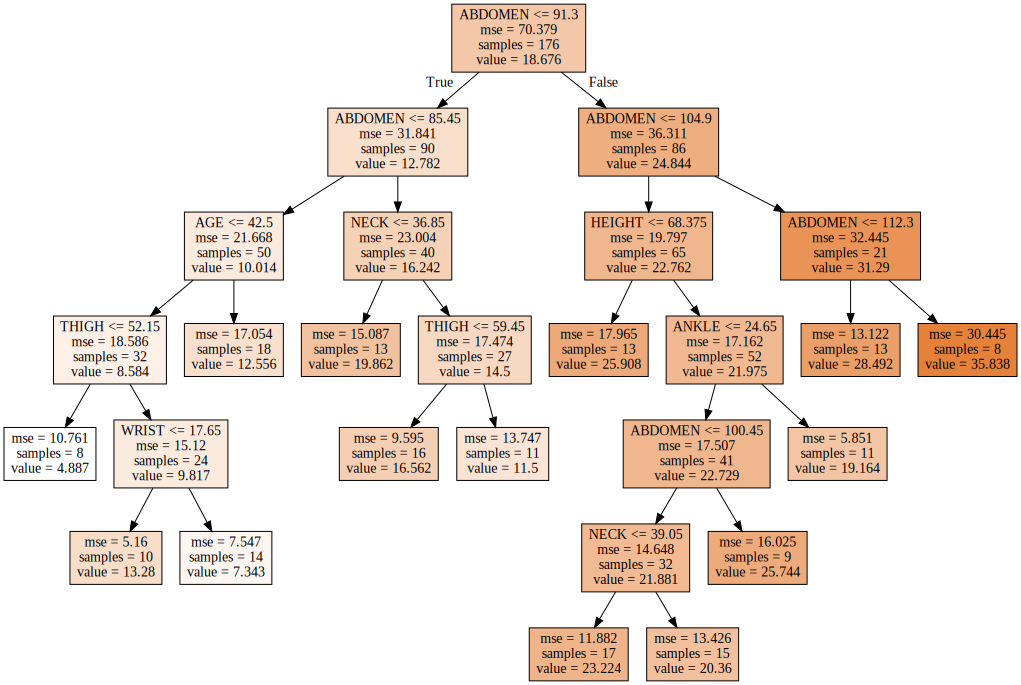

In [14]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8,min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file='tree_leaf.dot', feature_names = v_feature_name,impurity=True,filled=True)

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

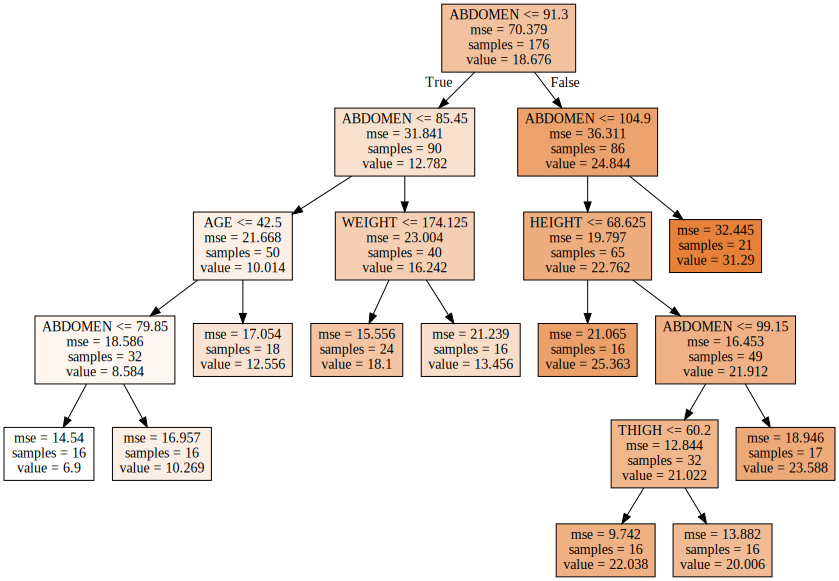

In [15]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 16,min_samples_split=26)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file='tree_leaf.dot', feature_names = v_feature_name,impurity=True,filled=True)

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [16]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split=20,max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["Depth"] = para_depth
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,Depth,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


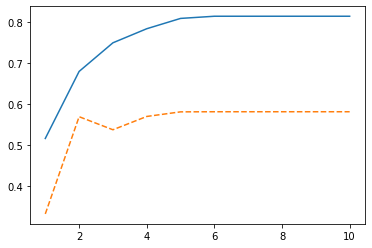

In [17]:
plt.plot(para_depth, train_score, linestyle = '-', label="train Score")
plt.plot(para_depth, test_score, linestyle = '--', label="train Score")

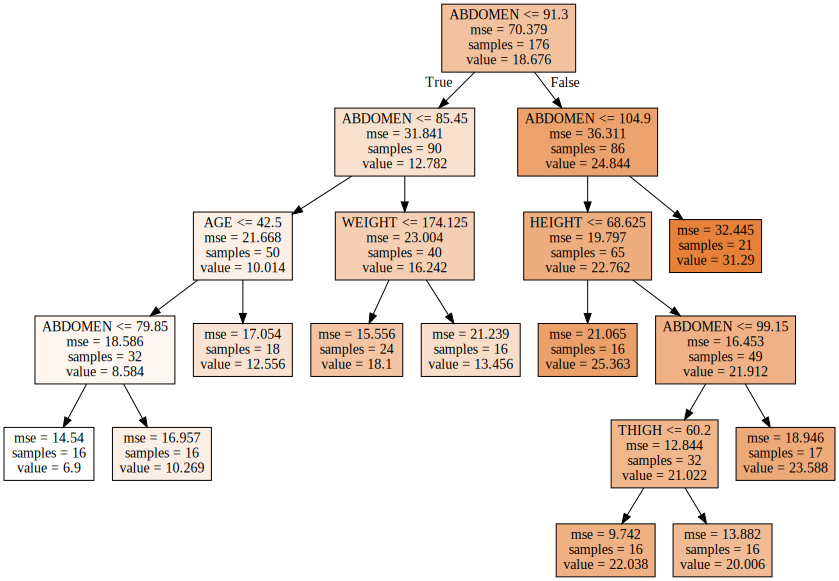

In [18]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split=20,max_depth=2)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file='tree_depth.dot', feature_names = v_feature_name,impurity=True,filled=True)

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

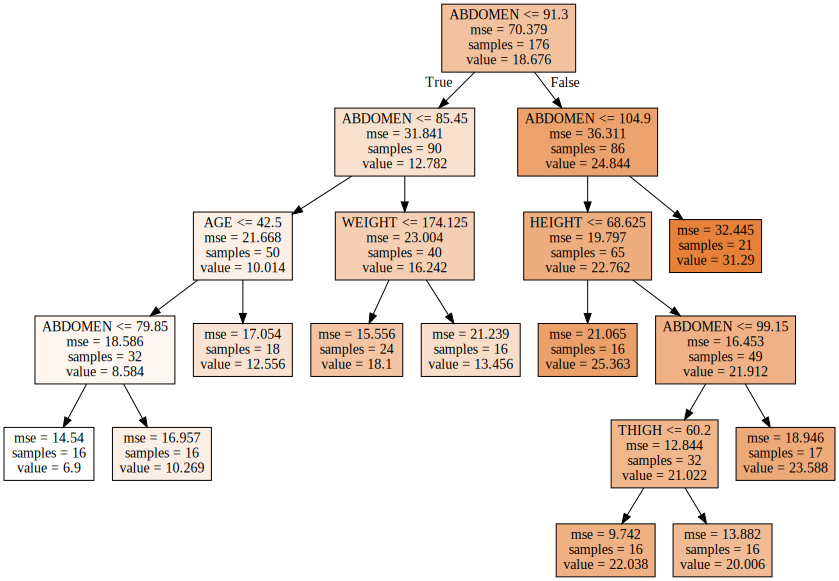

In [19]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split=20,max_depth=4)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file='tree_depth.dot', feature_names = v_feature_name,impurity=True,filled=True)

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [20]:
tree_final=DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split=20,max_depth=4)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

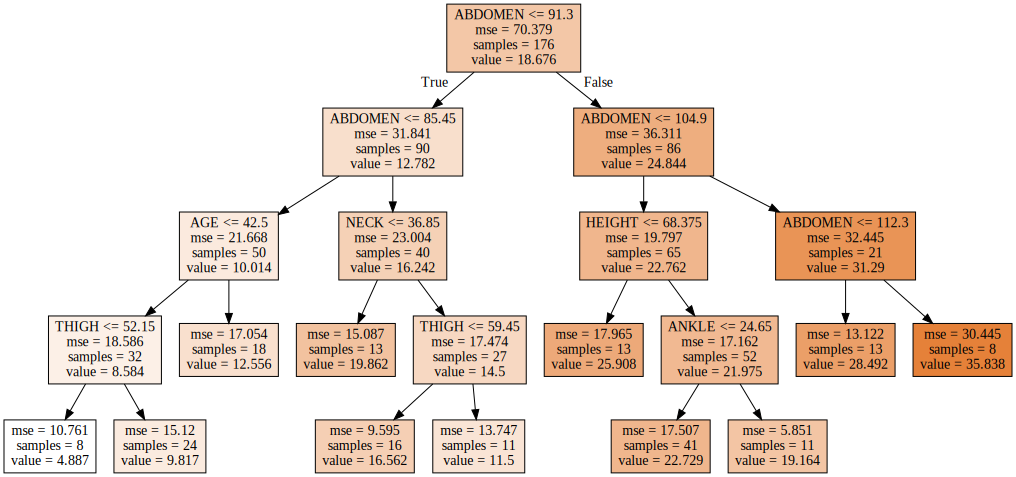

In [21]:
export_graphviz(tree_graph, out_file='tree_final.dot', feature_names = v_feature_name,impurity=True,filled=True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [22]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runtim

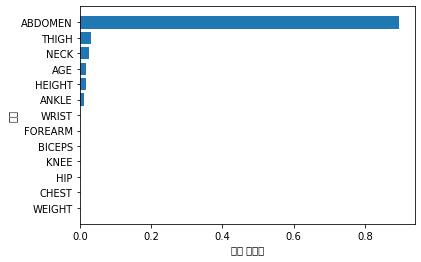

In [23]:
df_importance.sort_values("Importance", ascending =True , inplace= True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [24]:
estimator = DecisionTreeRegressor()
param_grid = {"criterion":["mse", "friedman_mse", "mae"],"max_features":["auto",'sqrt','log2'],
             "max_depth":para_depth, "min_samples_split":para_split,
             "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs =-1)
grid_dt.fit(df_train_x, df_train_y)

print(grid_dt.best_estimator_)
print(grid_dt.best_params_)
print(grid_dt.best_score_.round(3))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=17,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
{'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 6}
0.636


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


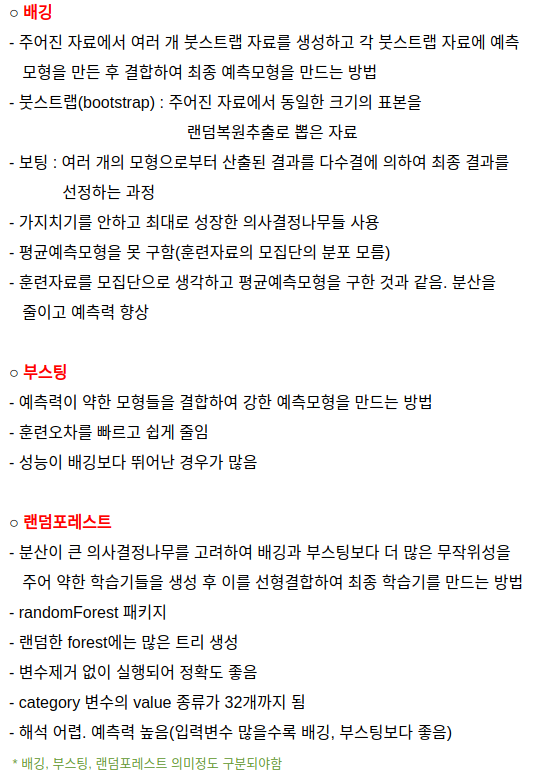

In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [26]:
df = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/체질검사.csv',engine='python',encoding='euc-kr')
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [28]:
df_y = df["FAT"]
df_x = df.drop("FAT", axis=1,inplace = False)
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3 , random_state = 1234)


In [29]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 설명력
print(rf_uncustomized.score(df_train_x,df_train_y))
print(rf_uncustomized.score(df_test_x,df_test_y))

0.9336861358272488
0.5522614867521729


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
train_score=[]; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_n=pd.DataFrame()
df_score_n['n_estimator']= para_n_tree
df_score_n['TrainScore']= train_score
df_score_n['TestScore']= test_score
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.934,0.552
1,20,0.945,0.600
2,30,0.951,0.615
3,40,0.954,0.613
4,50,0.954,0.610
5,60,0.956,0.614
6,70,0.955,0.614
7,80,0.955,0.612
8,90,0.956,0.610
9,100,0.956,0.611


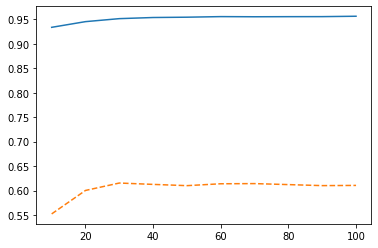

In [37]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = "train score")
plt.plot(para_n_tree, test_score, linestyle = '--', label = "test_score")

In [40]:
train_score=[]; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(n_estimators=100,min_samples_leaf=v_min_samples_leaf, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_leaf=pd.DataFrame()
df_score_leaf['n_estimator']= para_leaf
df_score_leaf['TrainScore']= train_score
df_score_leaf['TestScore']= test_score
df_score_leaf.round(3)

,n_estimator,TrainScore,TestScore
0,1,0.956,0.611
1,2,0.939,0.610
2,3,0.915,0.611
3,4,0.891,0.617
4,5,0.869,0.622
5,6,0.849,0.627
6,7,0.830,0.626
7,8,0.816,0.621
8,9,0.800,0.619
9,10,0.786,0.619


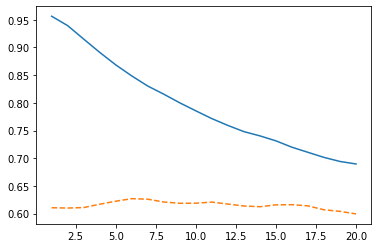

In [41]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "train score")
plt.plot(para_leaf, test_score, linestyle = '--', label = "test_score")

In [44]:
train_score=[]; test_score = []
para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(n_estimators=100,min_samples_leaf=6,min_samples_split=v_min_samples_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_split=pd.DataFrame()
df_score_split['n_estimator']= para_split
df_score_split['TrainScore']= train_score
df_score_split['TestScore']= test_score
df_score_split.round(3)

,n_estimator,TrainScore,TestScore
0,4,0.849,0.627
1,6,0.849,0.627
2,8,0.849,0.627
3,10,0.849,0.627
4,12,0.849,0.627
5,14,0.839,0.629
6,16,0.831,0.629
7,18,0.821,0.628
8,20,0.813,0.628
9,22,0.803,0.628


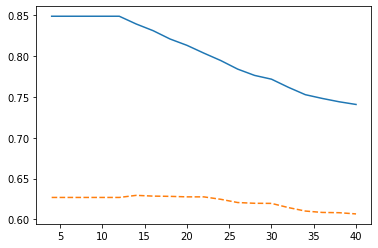

In [45]:
plt.plot(para_split, train_score, linestyle = '-', label = "train score")
plt.plot(para_split, test_score, linestyle = '--', label = "test_score")

In [51]:
train_score=[]; test_score = []
para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(n_estimators=100,min_samples_leaf=6,min_samples_split=14, max_depth=v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_depth=pd.DataFrame()
df_score_depth['depth']= para_depth
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= test_score
df_score_depth.round(3)



,depth,TrainScore,TestScore
0,1,0.557,0.448
1,2,0.721,0.598
2,3,0.789,0.620
3,4,0.825,0.627
4,5,0.837,0.631
5,6,0.839,0.629
6,7,0.839,0.629
7,8,0.839,0.629
8,9,0.839,0.629
9,10,0.839,0.629


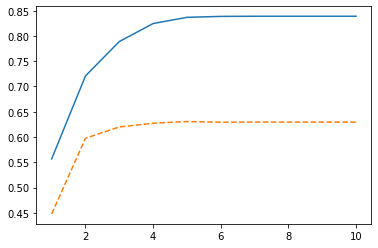

In [53]:
plt.plot(para_depth, train_score, linestyle = '-', label = "train score")
plt.plot(para_depth, test_score, linestyle = '--', label = "test_score")

In [64]:
rf_final = RandomForestRegressor(n_estimators=100,min_samples_leaf=6,min_samples_split=14, max_depth=4, random_state = 1234)
rf_final.fit(df_train_x,df_train_y)

print(rf_final.score(df_train_x, df_train_y))
print(rf_final.score(df_test_x, df_test_y))

0.8163393869602646
0.6293363691326979


In [55]:
rf_final

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=14,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

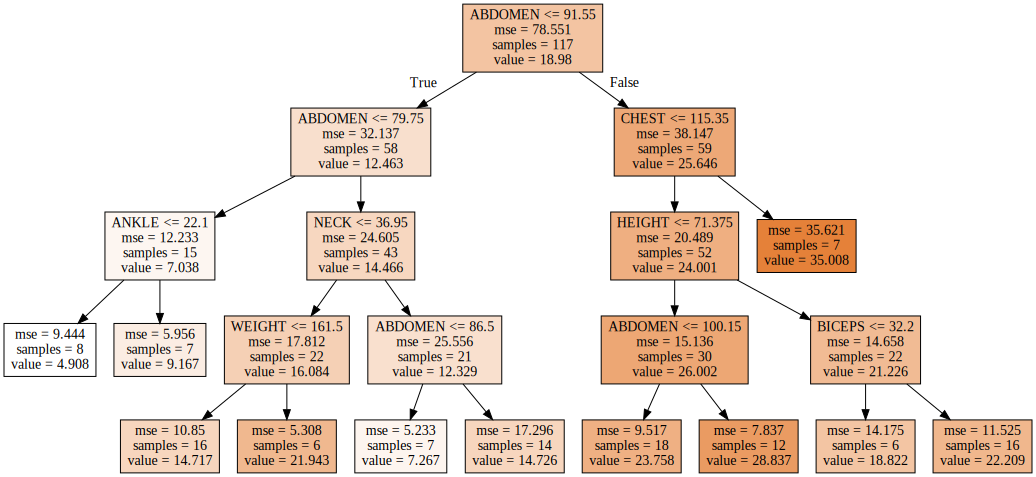

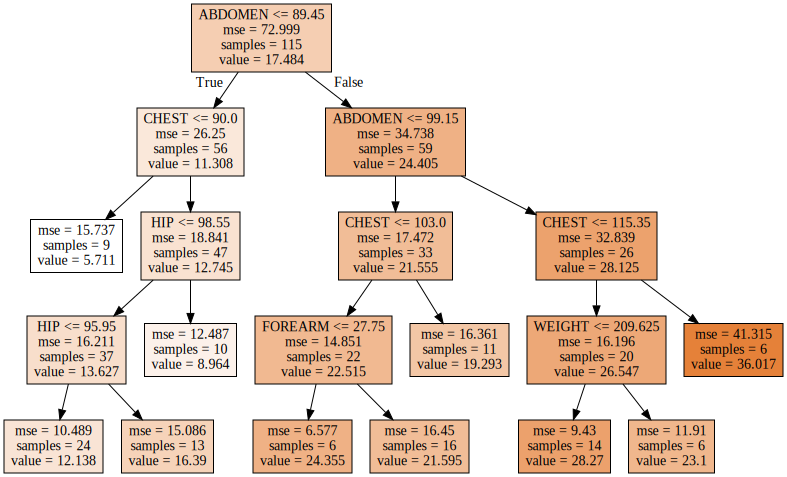

In [58]:
#1번트리
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0],out_file='rfr_final_0.dot',feature_names = v_feature_name,impurity=True,filled=True)

with open('rfr_final_0.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#2번트리
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[1],out_file='rfr_final_1.dot',feature_names = v_feature_name,impurity=True,filled=True)

with open('rfr_final_1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [59]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)


,Feature,Importance
5,ABDOMEN,0.843
4,CHEST,0.036
2,HEIGHT,0.032
0,AGE,0.014
6,HIP,0.014
7,THIGH,0.011
12,WRIST,0.010
3,NECK,0.010
8,KNEE,0.009
1,WEIGHT,0.008


Text(0, 0.5, '변수')

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runtim

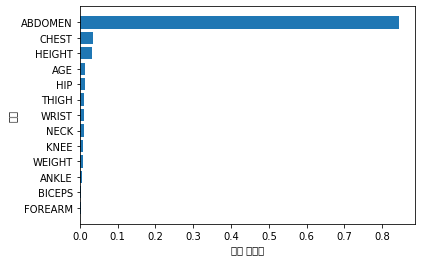

In [60]:


df_importance.sort_values("Importance", ascending =True , inplace= True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")


In [62]:
estimator = RandomForestRegressor(random_state=1234)
param_grid = {
             "max_depth":para_depth, "min_samples_split":para_split,
             "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs =-1)
grid_dt.fit(df_train_x, df_train_y)

print(grid_dt.best_estimator_)
print(grid_dt.best_params_)
print(grid_dt.best_score_.round(3))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.685


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
